### 3. Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonalised

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.style as style 
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

#### Small preprocessing steps

In [2]:
df=pd.read_csv("deseasonalize_data.csv")
df["date"]=pd.to_datetime(df["date"])
comm = df['Commodity'].unique().tolist()

df_msp = pd.read_csv("CMO_MSP_Mandi_filtered.csv")
df_msp['commodity'] = df_msp['commodity'].str.lower()
commodities = df_msp['commodity'].unique().tolist()

# Removing 2012, 2013s data as we don't have modal prices for those years
df_msp = df_msp[df_msp['year'] != 2012]
df_msp = df_msp[df_msp['year'] != 2013]
df_msp["year"]=pd.to_datetime(df_msp["year"], format= '%Y')
df_msp.head()


,commodity,year,Type,msprice,msp_filter
2,paddy-unhusked,2014-01-01,Kharif Crops,1360.0,1
3,paddy-unhusked,2015-01-01,Kharif Crops,1410.0,1
4,paddy-unhusked,2016-01-01,Kharif Crops,1470.0,1
7,rice(paddy-hus),2014-01-01,Kharif Crops,1400.0,1
8,rice(paddy-hus),2015-01-01,Kharif Crops,1450.0,1


## A Function which accepts apmc and commodity and prints a comparison line plot

In [3]:
def compare_price(apmc, commodity):
    
    label = str(apmc)+':'+str(commodity)
    data_filter = df[df["combination_label"]==label]
    
    # If no such match found within our data due to:
    # 1. Insufficient MSP data
    # 2. Invalid apmc,commodity cluster
    # 3. Apmc, commodity group which has already been filtered out during pre processing
    if data_filter.shape[0] == 0: 
        return "Not enough data"
    
    msp = df_msp[df_msp['commodity'] == 'bajri']
    msp = msp[['year', 'msprice']]
    
    # Plotting (Dates on X axis)
    xaxis = pd.to_datetime(data_filter['date'])
    plt.figure(figsize=(9, 7))
    plt.plot(data_filter['date'], data_filter['modal_price'])
    plt.plot(data_filter['date'], data_filter['deseasonalise_price'])
    plt.plot(msp['year'], msp['msprice'], color = 'y')
    #plt.plot(data_filter[])
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks(rotation=45)
    plt.legend(['Actual price', 'Deseasonalized', 'MSP'])
    plt.show()

## Enter the cluster of APMC, Commodity you want to compare

Enter APMC: Pavani
Enter Commodity within that APMC: paddy-unhusked


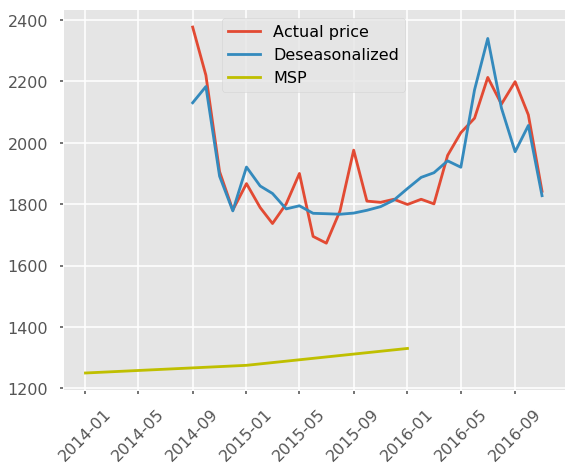

None


In [4]:
apmc = input('Enter APMC: ')
comm = input('Enter Commodity within that APMC: ')

compare_price(apmc, comm)